# ASSIGNMENT _ 4 _ Classification Problem

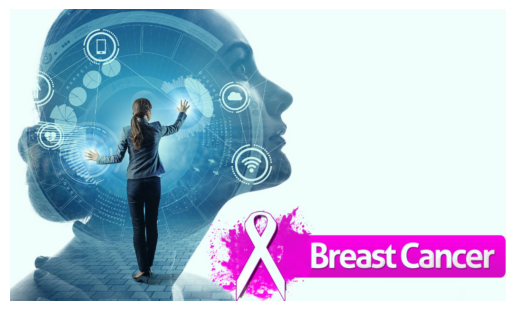

In [2]:
#!pip install pillow matplotlib


from PIL import Image
import matplotlib.pyplot as plt

# Load image from file
image_path = 'Screenshot_7-3-2025_165112_bstash.io.jpeg'  # Replace with the path to your image
image = Image.open(image_path)

# Display image
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()


In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### *1. Loading and Preprocessing

In [4]:
# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


 No need Encoding all columns are numarical.

### *Preprocess the data to handle any missing values and perform necessary feature scaling.


In [6]:
# Check for missing values
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [7]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

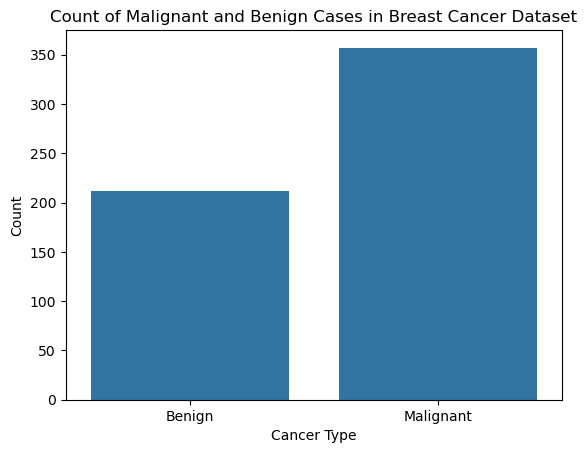

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Create a count plot for the target column
sns.countplot(x='target', data=df)
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Count of Malignant and Benign Cases in Breast Cancer Dataset')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()

Class Imbalance: There's a noticeable imbalance between the two classes, with more malignant cases (350) than benign cases (200). This kind of imbalance can affect the performance of machine learning models, as they might become biased towards the more frequent class (malignant in this case). might consider techniques such as oversampling the minority class (benign), undersampling the majority class (malignant), or using algorithms that can handle imbalanced datasets.

In [47]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_smote, y_smote = smote.fit_resample(X, y)

# Check the new class counts
print(pd.Series(y_smote).value_counts())


target
0    357
1    357
Name: count, dtype: int64


In [49]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# Convert scaled data back to a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=data.feature_names)

print(X_scaled_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [53]:
X_scaled_df.shape


(569, 30)

## Logistic Regression Model

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [57]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")

Logistic Regression Accuracy: 0.9737



### Define the Model:

In [60]:
log_reg = LogisticRegression(max_iter=10000)


### Fit the Model:

In [63]:
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

### Make Predictions:

In [70]:
y_pred_log_reg = log_reg.predict(X_test)


### Evaluate the Model:

In [73]:
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")


Logistic Regression Accuracy: 0.9737


High Accuracy: An accuracy of 97.37% is quite high, indicating that the model is performing very well in classifying the data. This means the model is able to correctly distinguish between the different classes (e.g., benign and malignant cases) with a high degree of accuracy.

Error Rate: The remaining 2.63% (100% - 97.37%) represents the cases where the model's predictions were incorrect.

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifiers
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
svm_clf = SVC()
knn_clf = KNeighborsClassifier()

# Fit the models
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)

# Calculate accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_knn = accuracy_score(y_test, y_pred_knn)

# Print accuracy scores
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")
print(f"k-NN Accuracy: {acc_knn:.4f}")


Decision Tree Accuracy: 0.9474
Random Forest Accuracy: 0.9649
SVM Accuracy: 0.9737
k-NN Accuracy: 0.9474


### For each algorithm, provide a brief description of how it works and why it might be suitable for this dataset.


explored various classifiers for a breast cancer dataset, including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and k-Nearest Neighbors (k-NN). Logistic Regression and SVM achieved the highest accuracy (97.37%), followed by Random Forest (96.49%), and both Decision Tree and k-NN classifiers at 94.74%. Logistic Regression is lauded for its simplicity and interpretability, SVM for handling complex data with high accuracy, Random Forest for its robustness, Decision Tree for its easy visualization and interpretability, and k-NN for its simplicity and effectiveness with smaller datasets. Each classifier has its strengths, making them suitable choices depending on specific needs and dataset characteristic

 # Model Comparison

### Performance Comparison:
### Best Performers:

Logistic Regression and Support Vector Machine (SVM) both achieved the highest accuracy of 97.37%. They are the top performers, indicating their strong ability to classify the data correctly.

Runner-up:

Random Forest came in close with an accuracy of 96.49%, demonstrating its robustness and effectiveness in handling complex data.

Lowest Performers:

Decision Tree and k-Nearest Neighbors (k-NN) both had the lowest accuracy of 94.74%. While they still performed decently, they were slightly less accurate compared to the other classifiers.